In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep
import os

print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'training', 'SampleSubmission.csv', 'IdLookupTable.csv']


In [2]:
train_dir = "../input/training/training.csv"
test_dir = "../input/test/test.csv"
look_dir = "../input/IdLookupTable.csv"
train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)
lookup_data = pd.read_csv(look_dir)
lookup_data.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [3]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


Check for the missing values

In [4]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [5]:
train_data.fillna(method = "ffill",inplace = True)

In [6]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [7]:
imag = []
for i in range(7049):
    img = train_data["Image"][i].split(' ')
    img = ['0' if x == ' ' else x for x in img]
    imag.append(img)

In [8]:
#reshape it into float
image_list = np.array(imag, dtype = 'float')
X_train = image_list.reshape(-1,96,96)

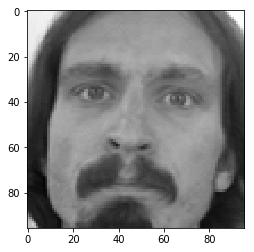

In [9]:
plt.imshow(X_train[0],cmap = 'gray')
plt.show()

In [10]:
#now lets separate labels
training = train_data.drop('Image',axis = 1)
y_train = []
for i in range(7049):
    y = training.iloc[i,:]
    y_train.append(y)
y_train = np.array(y_train,dtype = 'float') 

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten,Dropout

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])
model.compile(optimizer = 'adam',loss = 'mse',metrics=['mae','accuracy'])

Using TensorFlow backend.


In [12]:


model.fit(X_train,y_train,epochs = 500,batch_size = 128,validation_split = 0.2)



Train on 5639 samples, validate on 1410 samples
Epoch 1/500
5639/5639 [==============================] - 3s 586us/step - loss: 19526.3227 - mean_absolute_error: 77.0007 - acc: 0.0466 - val_loss: 1388.8918 - val_mean_absolute_error: 30.7394 - val_acc: 0.0014
Epoch 2/500
5639/5639 [==============================] - 1s 237us/step - loss: 1004.8178 - mean_absolute_error: 25.5181 - acc: 0.0156 - val_loss: 378.0712 - val_mean_absolute_error: 15.6242 - val_acc: 0.0461
Epoch 3/500
5639/5639 [==============================] - 1s 207us/step - loss: 427.1042 - mean_absolute_error: 15.4893 - acc: 0.3181 - val_loss: 197.2246 - val_mean_absolute_error: 10.6698 - val_acc: 0.3191
Epoch 4/500
5639/5639 [==============================] - 1s 211us/step - loss: 319.9772 - mean_absolute_error: 13.1340 - acc: 0.3653 - val_loss: 135.6250 - val_mean_absolute_error: 8.7254 - val_acc: 0.2362
Epoch 5/500
5639/5639 [==============================] - 1s 210us/step - loss: 275.4499 - mean_absolute_error: 12.1116 - 

In [13]:
#now lets prepare out test data
timage  = []
for j in range(1783):
    imgi = test_data['Image'][j].split(' ')
    imgi = ['0' if x == '' else x for x in imgi]
    timage.append(imgi)
timage = np.array(timage,dtype = 'float')

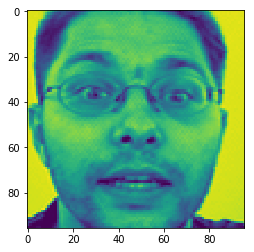

In [14]:
X_test = timage.reshape(-1,96,96)
plt.imshow(X_test[0])
plt.show()

In [15]:
#lets Predict our result
y_pred = model.predict(X_test)

In [16]:
df = pd.DataFrame(y_pred)
df.columns = train_data.columns[0:30]
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782
left_eye_center_x,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,...,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404,66.390404
left_eye_center_y,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,...,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360,37.505360
right_eye_center_x,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,...,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192,30.269192
right_eye_center_y,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,...,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605,37.899605
left_eye_inner_corner_x,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,59.272449,5

In [17]:


sub = lookup_data

for i in range(sub.shape[0]):
    row = sub.loc[i,'FeatureName']
    col = sub.loc[i,'ImageId'] - 1
    sub.loc[i,'Location'] = df.loc[row, col]
sub = sub.drop(['ImageId', 'FeatureName'],axis=1)
sub.head()




,RowId,Location
0,1,66.390404
1,2,37.505360
2,3,30.269192
3,4,37.899605
4,5,59.272449


In [18]:
sub.to_csv('facial_2.csv',index=False)